In [72]:
import pandas as pd 
import matplotlib as mpl
import seaborn as sns
import math
import matplotlib.pyplot as plt
import numpy as np
from random import sample, random, randint

from tensorflow import keras
from tensorflow.keras import layers, models
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.utils import to_categorical


In [73]:
df = pd.read_csv("creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


### Obtenemos solo los que no son fraudulentos

In [74]:
df_no_fraud = df[df['Class'] == 0]
df_no_fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [75]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [76]:
df_no_fraud = df_no_fraud.drop(["Time","Amount"],axis=1)

### Dividimos entre train, test y val

Para los de test meteremos la misma cantidad de no fraudulentos que de fraudulentos

In [77]:
from sklearn.model_selection import train_test_split

y = df_no_fraud["Class"].copy()

X_train_full, X_test, y_train_full, y_test = train_test_split(df_no_fraud.drop(['Class'],axis=1), y, test_size=0.2, stratify=y)

# Trabajar con los fraudulentos
df_fraud = df[df['Class'] == 1]
df_fraud = df_fraud.drop(["Time","Amount"],axis=1)

y_fraud = df_fraud["Class"].copy()
X_fraud = df_fraud.drop(["Class"],axis=1).copy()

X_test = X_test[:X_fraud.shape[0]].append(X_fraud,ignore_index=True)
y_test = y_test[:y_fraud.shape[0]].append(y_fraud,ignore_index=True)

C:\Users\oscar.torresrodrigue\AppData\Local\Temp\ipykernel_9788\965745643.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_test = X_test[:X_fraud.shape[0]].append(X_fraud,ignore_index=True)
C:\Users\oscar.torresrodrigue\AppData\Local\Temp\ipykernel_9788\965745643.py:15: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_test = y_test[:y_fraud.shape[0]].append(y_fraud,ignore_index=True)


In [78]:
# from sklearn.preprocessing import MinMaxScaler

# sc = MinMaxScaler()

# X_train_full = sc.fit_transform(X_train_full)
# X_fraud = sc.fit_transform(X_fraud)
# X_test = sc.fit_transform(X_test)

In [93]:
X_train_full = np.array(X_train_full)
X_test = np.array(X_test)
X_fraud = np.array(X_fraud)

In [80]:
X_test.shape

(984, 28)

In [81]:
X_valid, X_train = X_train_full[:27452], X_train_full[27452:]
y_valid, y_train = y_train_full[:27452], y_train_full[27452:]

In [82]:
y_test.shape

(984,)

In [83]:
X_test.shape

(984, 28)

In [84]:
encoder = keras.models.Sequential([
    keras.layers.Dense(20, input_shape=(28,), activation="relu"),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(5, activation="relu"),
])
encoder.summary()
decoder = keras.models.Sequential([
    keras.layers.Dense(10, input_shape=[5], activation="relu"),
    keras.layers.Dense(20, activation="relu"),
    keras.layers.Dense(28)
])
decoder.summary()
autoencoder = keras.models.Sequential([encoder, decoder])
autoencoder.summary()
autoencoder.compile(loss="mse", optimizer="adam")

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 20)                580       
                                                                 
 dense_19 (Dense)            (None, 10)                210       
                                                                 
 dense_20 (Dense)            (None, 5)                 55        
                                                                 
Total params: 845 (3.30 KB)
Trainable params: 845 (3.30 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 10)                60        
                                                                 
 

In [85]:
epochs = 1000

early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)

history = autoencoder.fit(X_train,X_train,epochs=epochs,validation_data=[X_valid,X_valid],callbacks=[early_stopping_cb])

Epoch 1/1000
6250/6250 [==============================] - 8s 1ms/step - loss: 0.5652 - val_loss: 0.4168
Epoch 2/1000
6250/6250 [==============================] - 7s 1ms/step - loss: 0.4058 - val_loss: 0.3606
Epoch 3/1000
6250/6250 [==============================] - 7s 1ms/step - loss: 0.3630 - val_loss: 0.3439
Epoch 4/1000
6250/6250 [==============================] - 7s 1ms/step - loss: 0.3473 - val_loss: 0.3300
Epoch 5/1000
6250/6250 [==============================] - 7s 1ms/step - loss: 0.3379 - val_loss: 0.3320
Epoch 6/1000
6250/6250 [==============================] - 7s 1ms/step - loss: 0.3302 - val_loss: 0.3215
Epoch 7/1000
6250/6250 [==============================] - 7s 1ms/step - loss: 0.3230 - val_loss: 0.3127
Epoch 8/1000
6250/6250 [==============================] - 7s 1ms/step - loss: 0.3173 - val_loss: 0.3029
Epoch 9/1000
6250/6250 [==============================] - 7s 1ms/step - loss: 0.3085 - val_loss: 0.2960
Epoch 10/1000
6250/6250 [==============================] - 7s 1m

<AxesSubplot:>

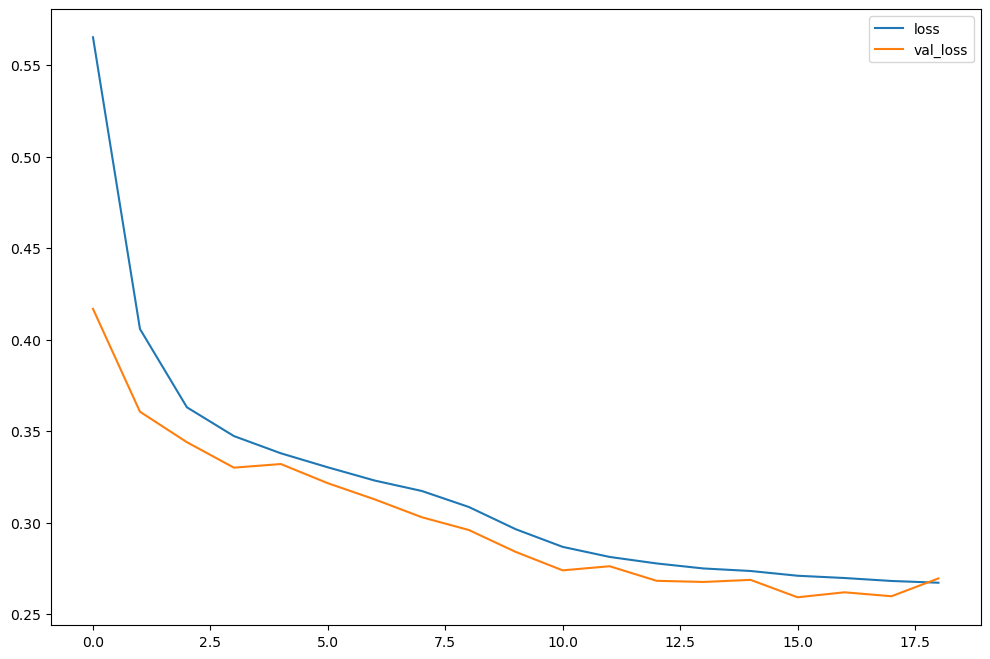

In [86]:
pd.DataFrame(history.history).plot(figsize=(12,8))

### mse con los datos de validacion que solo contienen datos no fraudulentos

In [87]:
x_val_pred = autoencoder.predict(X_valid)

858/858 [==============================] - 1s 717us/step


In [97]:
from sklearn.metrics import mean_squared_error
e_val = mean_squared_error(x_val_pred, X_valid)
e_val.mean()

0.2591746514155538

In [98]:
mse_values_val = [np.sqrt(mean_squared_error([true_val], [pred_val])) for true_val, pred_val in zip(X_valid, x_val_pred)]

In [99]:
# Obtener la desviacion media de los datos de validacion
st_val = np.std(mse_values_val)
st_val

0.21799329714753235

### mse con solo datos fraudulentos

In [100]:
from sklearn.metrics import mean_squared_error

x_fraud_pred = autoencoder.predict(X_fraud)

e_fraud = mean_squared_error(X_fraud, x_fraud_pred)
e_fraud.mean()

16/16 [==============================] - 0s 1ms/step


19.46868475929517

In [101]:
mse_values_fraud = [np.sqrt(mean_squared_error([true_value], [pred_value])) for true_value, pred_value in zip(X_fraud, x_fraud_pred)]

In [102]:
# Obtener la desviacion media de los datos de fraude
st_fraud = np.std(mse_values_fraud)
st_fraud

2.531164378711948

### mse con los datos de tes: fraudulentos y no fraudulentos

In [96]:
from sklearn.metrics import mean_squared_error

x_test_pred = autoencoder.predict(X_test)

e3 = mean_squared_error(X_test, x_test_pred)
e3.mean()

31/31 [==============================] - 0s 1ms/step


9.864204843951855

In [ ]:
X_fraud

array([[0.00000000e+00, 8.64015776e-01, 3.39927300e-01, ...,
        7.29424581e-01, 4.73055117e-01, 0.00000000e+00],
       [3.88367796e-04, 8.41641007e-01, 1.72188666e-01, ...,
        6.79606231e-01, 5.22125290e-01, 2.48839299e-01],
       [2.38669664e-02, 8.64287369e-01, 3.33599484e-01, ...,
        7.07945088e-01, 4.70382098e-01, 1.12862028e-01],
       ...,
       [9.94133293e-01, 9.14072241e-01, 3.12821945e-01, ...,
        7.41441290e-01, 5.65592618e-01, 3.66391172e-02],
       [9.97752174e-01, 8.39490434e-01, 2.95077231e-01, ...,
        7.89887960e-01, 4.42790687e-01, 1.15246934e-01],
       [1.00000000e+00, 9.95704117e-01, 2.81046045e-01, ...,
        7.04399239e-01, 5.08127517e-01, 2.00059270e-02]])

In [ ]:
x_fraud1_pred = autoencoder.predict(X_test)
y_test_pred_labels = np.argmax(x_fraud1_pred, axis=1)
y_test_true_labels = y_test

31/31 [==============================] - 0s 1ms/step


In [ ]:
autoencoder.evaluate(X_test,y_test)

31/31 [==============================] - 0s 1ms/step - loss: 0.3256


0.32555073499679565

# Pruebas

Utilizamos la media del error cuadratico medio y la desviacion media de los datos de fraude y de validacion, de esta forma obtenemos un valor que esté a mitad de distancia entre esos valores.

Ese valor sera nuestro indicativo para detectar si un valor es fraude o no.

In [103]:
z = (e_fraud.mean() - e_val.mean())/(st_fraud + st_val)
z

6.9874166464002725

In [104]:
pred = autoencoder.predict(X_test)
index = 0
detected_fraud = []
detected_no_fraud = []

for true_val, pred_val in zip(X_test, pred):

    value = np.sqrt(mean_squared_error([true_val], [pred_val]))
    if value > z:
        # Fraude
        detected_fraud.append(y_test[index])
    else:
        # No fraude
        detected_no_fraud.append(y_test[index])
    index += 1

31/31 [==============================] - 0s 1ms/step


In [105]:
len(detected_no_fraud)

898

In [ ]:
p = autoencoder.predict(X_test)
y_reales = y_test

diferentes=0
for index,i in enumerate(p):
    print("i",i)
    print(index)
    e = mean_squared_error(X_test.loc(index), i)
    print(e)
    break
#     if i != list(y_reales)[index]:
#         diferentes+=1
# print("FALLOS:",diferentes)

31/31 [==============================] - 0s 1ms/step
i [0.77948934 0.9892089  0.74536145 0.86023545 0.16803718 0.7694608
 0.24645694 0.22069518 0.80398846 0.2222481  0.42850423 0.23681757
 0.70979583 0.5571592  0.65755534 0.38711077 0.19442995 0.7059252
 0.666363   0.3226581  0.582273   0.58887887 0.44619805 0.6758428
 0.39822218 0.55617446 0.6062785  0.41386825 0.41732273 0.01509564]
0


AttributeError: 'numpy.ndarray' object has no attribute 'loc'